<a href="https://colab.research.google.com/github/ElFL4/cs666student/blob/main/CS666_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

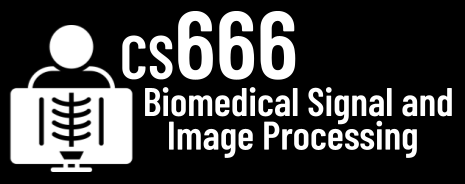

# Assignment 1

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Task 1** (5 pts): Install the BioSPPY library with the following code.

In [2]:
!pip install biosppy

**Task 2** (10 pts): Download a sample ecg dataset from https://cs666.org/data/ecg.txt and upload it to this colab. The following code loads the dataset. Note: this might fail with an import error, but should be an easy fix :)

In [3]:
!pip install peakutils

from biosppy import storage
signal, metadata = storage.load_txt('ecg.txt')

**Task 3** (10 pts): Figure out the sampling rate for this data and how many seconds it lasts.

In [8]:
SAMPLING_RATE = 1000 ### TODO! Done maybe?
SECONDS = 15 ### TODO!

**Task 4** (15 pts): Process the signal with BioSPPY using the `ecg.ecg` method.

In [11]:
from biosppy.signals import ecg

times, filtered_signal, rpeaks, templates_ts, templates, heart_rate_ts, heart_rate = ecg.ecg(signal=signal, sampling_rate=SAMPLING_RATE, show=False)

**Task 5** (10 pts): Plot the first 3 seconds of the unfiltered signal and then the filtered signal. Can you spot the P, Q, R, S, T waves?

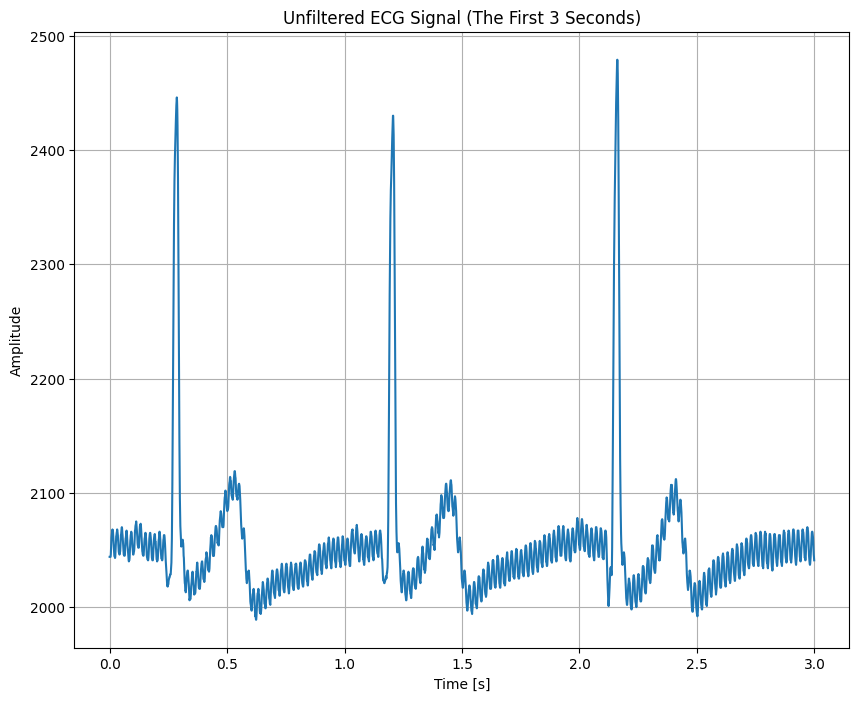

In [12]:
### Plot first 3 seconds of unfiltered signal
plt.figure(figsize=(10, 8))
plt.plot(times[:3*SAMPLING_RATE], signal[:3*SAMPLING_RATE])
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Unfiltered ECG Signal (The First 3 Seconds)')
plt.grid(True)
plt.show()

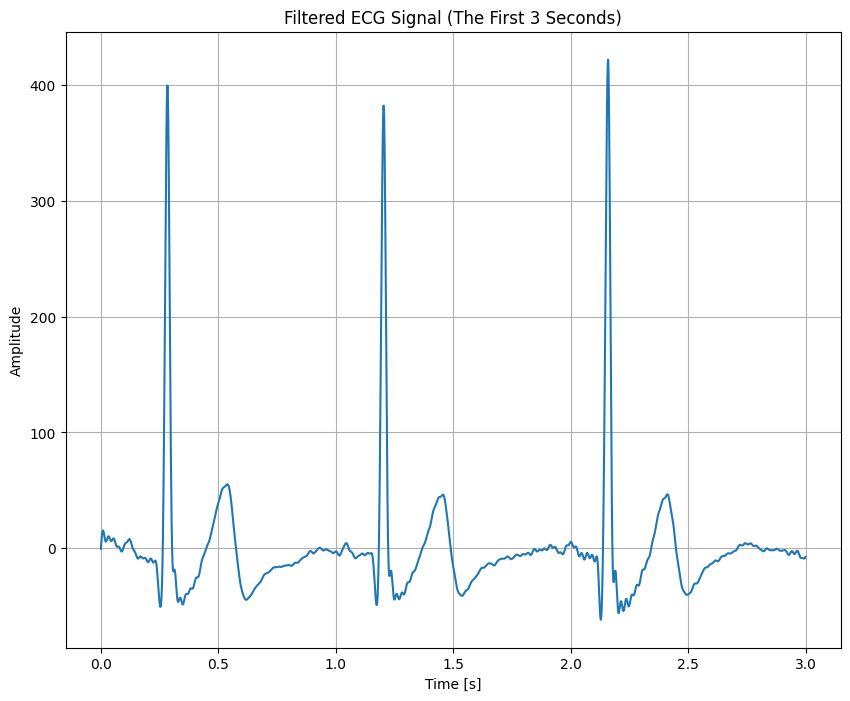

In [13]:
### Plot first 3 seconds of filtered signal
plt.figure(figsize=(10, 8))
plt.plot(times[:3*SAMPLING_RATE], filtered_signal[:3*SAMPLING_RATE])
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Filtered ECG Signal (The First 3 Seconds)')
plt.grid(True)
plt.show()

**Task 6** (15 pts): Please plot the whole filtered signal and mark the r-peaks with vertical lines based on the ecg.ecg output. You can use `plt.axvline(x = 100, color = 'r', ls=':')` to create a red, dashed vertical line at position 100. Please label the x-axis as 'time [s]'.

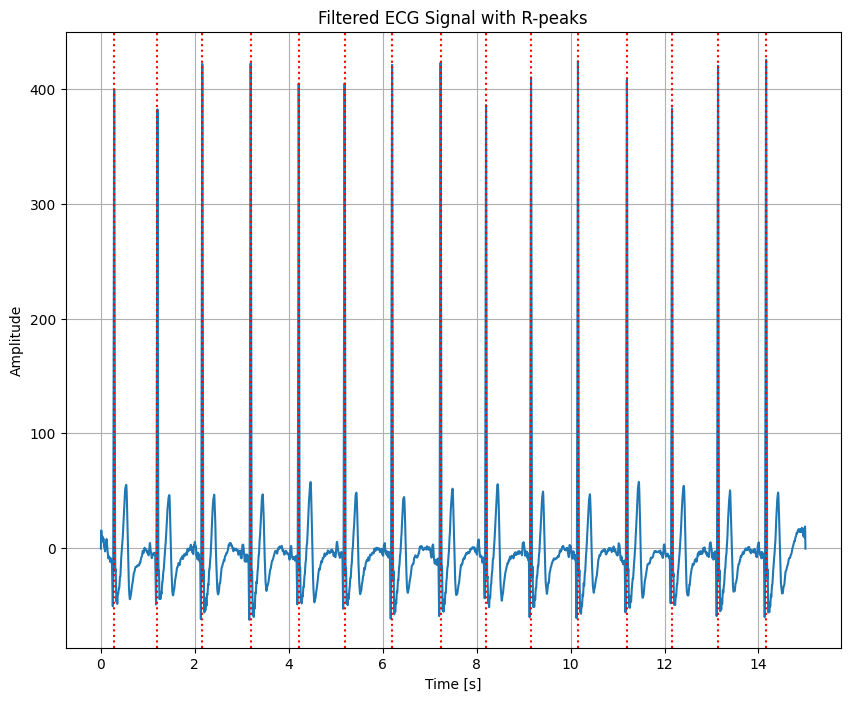

In [14]:
plt.figure(figsize=(10, 8))
plt.plot(times, filtered_signal)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Filtered ECG Signal with R-peaks')

for r in rpeaks:
    plt.axvline(x=times[r], color='r', ls=':')

plt.grid(True)
plt.show()

**Task 7** (5 pts): Let's install the NeuroKit2 library.

In [15]:
!pip install neurokit2
import neurokit2 as nk

**Task 8** (20 pts): Detect P Q S T Peaks using Neurokit.

/usr/local/lib/python3.12/dist-packages/neurokit2/epochs/epochs_create.py:180: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  buffer.select_dtypes(exclude=["int", "int64"]).replace({0.0: np.nan}, inplace=True)
/usr/local/lib/python3.12/dist-packages/neurokit2/epochs/epochs_create.py:180: ChainedAssignmentError: A value is being set on

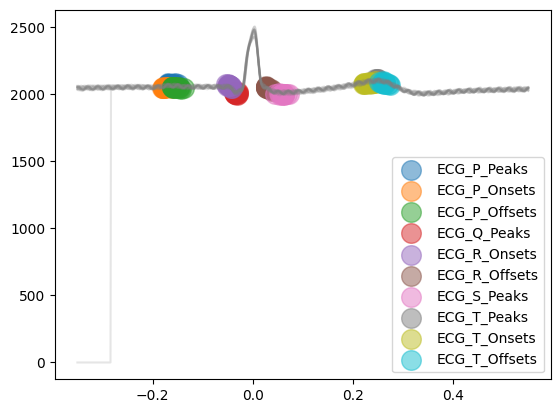

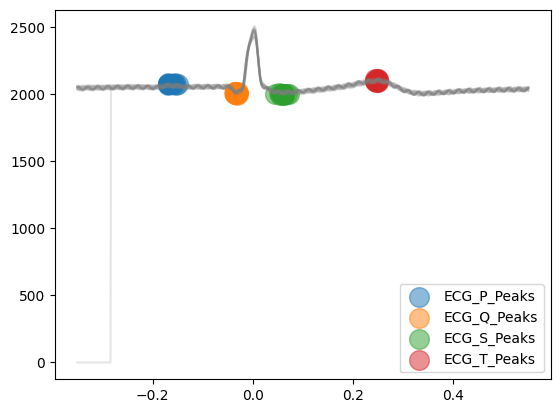

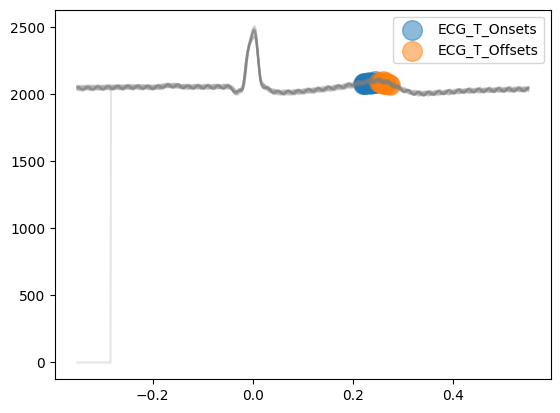

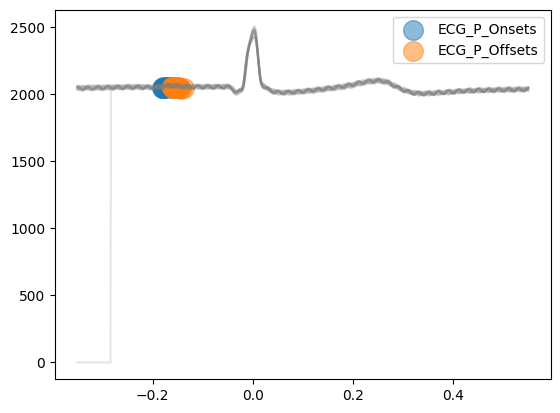

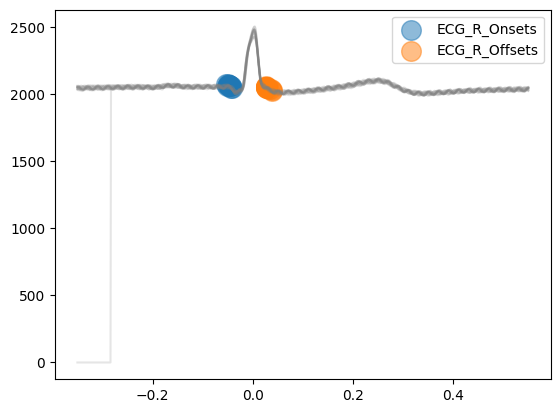

In [16]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the unfiltred signal?
# Hint: Look at the tutorial: https://neuropsychology.github.io/NeuroKit/examples/ecg_delineate/ecg_delineate.html
# Hint 2: The plot will have blue, orange, green, and red circles :)
# Hint 3: rpeaks were detected above from biosppy's ecg.ecg method

from biosppy import storage # Import storage to load the signal
from biosppy.signals import ecg # Import ecg from biosppy to get rpeaks

SAMPLING_RATE = 1000 # SAMPLING_RATE issue???

signal, metadata = storage.load_txt('ecg.txt') # Load the signal here

# Run biosppy ecg.ecg to get rpeaks, times, and filtered_signal
times, filtered_signal, rpeaks, templates_ts, templates, heart_rate_ts, heart_rate = ecg.ecg(signal=signal, sampling_rate=SAMPLING_RATE, show=False)

# Delineate the ECG signal and show all waves
signal_dwt, waves_dwt = nk.ecg_delineate(signal,
                                         rpeaks,
                                         sampling_rate=SAMPLING_RATE,
                                         method="dwt",
                                         show=True,
                                         show_type='all')

# Visualize P-peaks and T-peaks
signal_dwt, waves_dwt = nk.ecg_delineate(signal,
                                         rpeaks,
                                         sampling_rate=SAMPLING_RATE,
                                         method="dwt",
                                         show=True,
                                         show_type='peaks')

# Visualize T-wave boundaries
signal_dwt, waves_dwt = nk.ecg_delineate(signal,
                                         rpeaks,
                                         sampling_rate=SAMPLING_RATE,
                                         method="dwt",
                                         show=True,
                                         show_type='bounds_T')

# Visualize P-wave boundaries
signal_dwt, waves_dwt = nk.ecg_delineate(signal,
                                         rpeaks,
                                         sampling_rate=SAMPLING_RATE,
                                         method="dwt",
                                         show=True,
                                         show_type='bounds_P')

# Visualize R-wave boundaries
signal_dwt, waves_dwt = nk.ecg_delineate(signal,
                                         rpeaks,
                                         sampling_rate=SAMPLING_RATE,
                                         method="dwt",
                                         show=True,
                                         show_type='bounds_R')

In [ ]:
# TODO Does the detection work well?
# Kind of but not really in my opinion.

**Task 9** (10 pts): Use the sleepecg library to find the R Peaks.

In [17]:
# We have the R spikes/peaks now from Biosppy from above but there is another
# library called sleepecg.
# TODO Please install it and run the rpeak detection!
# Docs: https://sleepecg.readthedocs.io/en/stable/

!pip install sleepecg

# ... module error...

ModuleNotFoundError: No module named 'sleepecg.rpeak_detectors'

In [ ]:
# TODO Do Biosppy and sleepecg give different rpeaks? Please calculate the MSE!

**Bonus Task** (33 pts): Detect P Q S T Peaks for the full signal before and after filtering.

In [ ]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal

In [ ]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass.
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.

In [ ]:
# Finally, run the delineation on the filtered signal from BioSPPY.

In [ ]:
# TODO Which one works the best?

In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#